In [76]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.decomposition import PCA
from scipy.stats import entropy

In [90]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store model performance
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        model_performance.append({
            "Model": name,
            "Accuracy": accuracy
        })

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=0)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    predictions = (sequential_model.predict(X_test_scaled) > 0.5).astype("int32")
    model_performance.append({
        "Model": "Sequential",
        "Accuracy": accuracy
    })

    # Convert the model_performance to a DataFrame
    return pd.DataFrame(model_performance)

def automate_pca(pca_components, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
  pca = PCA(n_components=pca_components)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)
  
  models = run_all_models(X_train_pca, X_test_pca, y_train_encoded, y_test_encoded)
  print(models)
  
def labels_to_probabilities(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return probabilities

def calculate_entropy(df:pd.DataFrame)-> pd.DataFrame:
  """_summary_

  Args:
      df (pd.DataFrame): _description_

  Returns:
      pd.DataFrame: _description_
  """

  column_entropy_info = {}
  for col in df.columns:
    probabilities = labels_to_probabilities(df[col])
    entropy_value = entropy(probabilities, base=2)
    column_entropy_info[col] = {
          'entropy': entropy_value
      }

  return pd.DataFrame(column_entropy_info)


def create_confusion_matrix(model, predictions, y_true):
    
    cm = confusion_matrix(y_true, predictions)
    
    print(f"Classification Matrix: {classification_report(predictions, y_true)}")
    
    plt.figure(figsize=(15,8))
    sns.heatmap(data=cm, fmt="g", cmap="Blues", annot=True)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix for {model}")
    plt.show()

In [92]:
df = pd.read_csv("valentine_dataset.csv")
df

,Name,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
0,Leon Cruz,26,Male,77648,63.94,88.18,30.09,Bsc,Employed,1
1,Samuel Brown,23,Male,71617,2.50,49.98,76.45,Bsc,Employed,1
2,Lori Baker,34,Male,38616,27.50,33.90,33.76,PhD,Employed,1
3,Tina Fitzgerald,37,Male,79473,22.32,25.47,43.32,Master,Self Employed,1
4,Jason Simmons,38,Male,43510,73.65,43.63,32.44,Bsc,Employed,0
...,...,...,...,...,...,...,...,...,...,...
19995,Michael Vega,26,Female,36355,65.62,45.80,87.23,High School,Employed,0
19996,Debra Horn,21,Female,55355,32.17,19.26,7.88,High School,Employed,1
19997,Aaron Burgess,31,Male,31910,45.02,13.93,39.64,PhD,Self Employed,1
19998,Rebecca Morton,33,Female,22483,73.67,64.29,29.53,Master,Self Employed,1


In [94]:
df["Income"].max()

79998

In [95]:
df["Income"].min()

20004

In [99]:
df["Interests_Score"].max()
df["Interests_Score"].min()

df["Confidence_Score"].max()
df["Confidence_Score"].min()

0.01

In [100]:
df[df["Confidence_Score"] <10.0]

,Name,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
5,Toni Nelson,40,Female,69789,67.67,7.70,2.10,High School,Self Employed,1
9,Cheryl Baker,28,Male,54551,2.98,52.70,5.45,High School,Self Employed,1
26,John Ponce,26,Female,55718,9.27,49.01,1.27,Master,Self Employed,1
31,Terri Alvarez,37,Male,69729,72.97,77.94,0.01,Bsc,Employed,0
42,James Lopez,24,Female,21549,22.79,42.48,5.62,Bsc,Self Employed,1
...,...,...,...,...,...,...,...,...,...,...
19960,Abigail Gomez,39,Female,57903,13.84,93.77,6.71,PhD,Self Employed,0
19966,Ryan Parker,34,Female,35598,60.74,57.91,1.34,High School,Self Employed,0
19980,Anthony Stanley,33,Female,57491,34.69,27.03,8.35,Master,Employed,1
19989,Samuel Crawford,29,Female,20166,32.74,46.14,4.84,Master,Employed,0


In [104]:
df["Appearance_Score"].min()

0.0

In [105]:
df["Appearance_Score"].max()

99.99

In [79]:
df.describe()

,Age,Income,Appearance_Score,Interests_Score,Confidence_Score,Valentine_Date
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,29.033800,50051.034150,50.136727,49.950643,49.913995,0.493300
std,6.622458,17329.779354,28.877615,28.774120,28.978751,0.499968
min,18.000000,20004.000000,0.000000,0.010000,0.010000,0.000000
25%,23.000000,35013.250000,25.070000,25.310000,24.807500,0.000000
50%,29.000000,50230.000000,50.320000,49.530000,49.960000,0.000000
75%,35.000000,65120.500000,75.222500,74.880000,74.950000,1.000000
max,40.000000,79998.000000,99.990000,100.000000,100.000000,1.000000


In [50]:
df.isna().sum()

Name                  0
Age                   0
Gender                0
Income                0
Appearance_Score      0
Interests_Score       0
Confidence_Score      0
Educational_Status    0
Job_Type              0
Valentine_Date        0
dtype: int64

In [51]:
df.duplicated().sum()

0

In [52]:
df.dtypes

Name                   object
Age                     int64
Gender                 object
Income                  int64
Appearance_Score      float64
Interests_Score       float64
Confidence_Score      float64
Educational_Status     object
Job_Type               object
Valentine_Date          int64
dtype: object

In [53]:
df["Name"].value_counts()

Name
Michael Johnson      13
Jennifer Williams     9
Michael Davis         8
Ashley Jones          8
Michael Williams      8
                     ..
Brianna Campbell      1
Michael Cox           1
Michael Cole          1
Jesse Meyer           1
Erik Curry            1
Name: count, Length: 17795, dtype: int64

In [54]:
df["Educational_Status"].value_counts()

Educational_Status
High School    5107
Bsc            4985
PhD            4955
Master         4953
Name: count, dtype: int64

In [55]:
df["Job_Type"].value_counts()

Job_Type
Employed         10014
Self Employed     9986
Name: count, dtype: int64

In [56]:
df["Gender"].value_counts()

Gender
Male      10047
Female     9953
Name: count, dtype: int64

In [80]:
educational_values = {"High School": 0, "Bsc":1, "PhD":2, "Master":3}

df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "Male" else 0)
df["Job_Type"] = df["Job_Type"].apply(lambda x: 1 if x == "Employed" else 0)
df["Educational_Status"] = df["Educational_Status"].apply(lambda x: educational_values[x])

In [82]:
df.drop("Name", inplace=True, axis=1)

In [108]:
score_columns = [ col for col in df.columns if "_" in col and col.split("_")[1] == "Score"]
score_columns

['Appearance_Score', 'Interests_Score', 'Confidence_Score']

/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18909/937024843.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18909/937024843.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18909/937024843.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18909/937024843.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18909/937024843.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18909/937024843.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18909/937024843.p

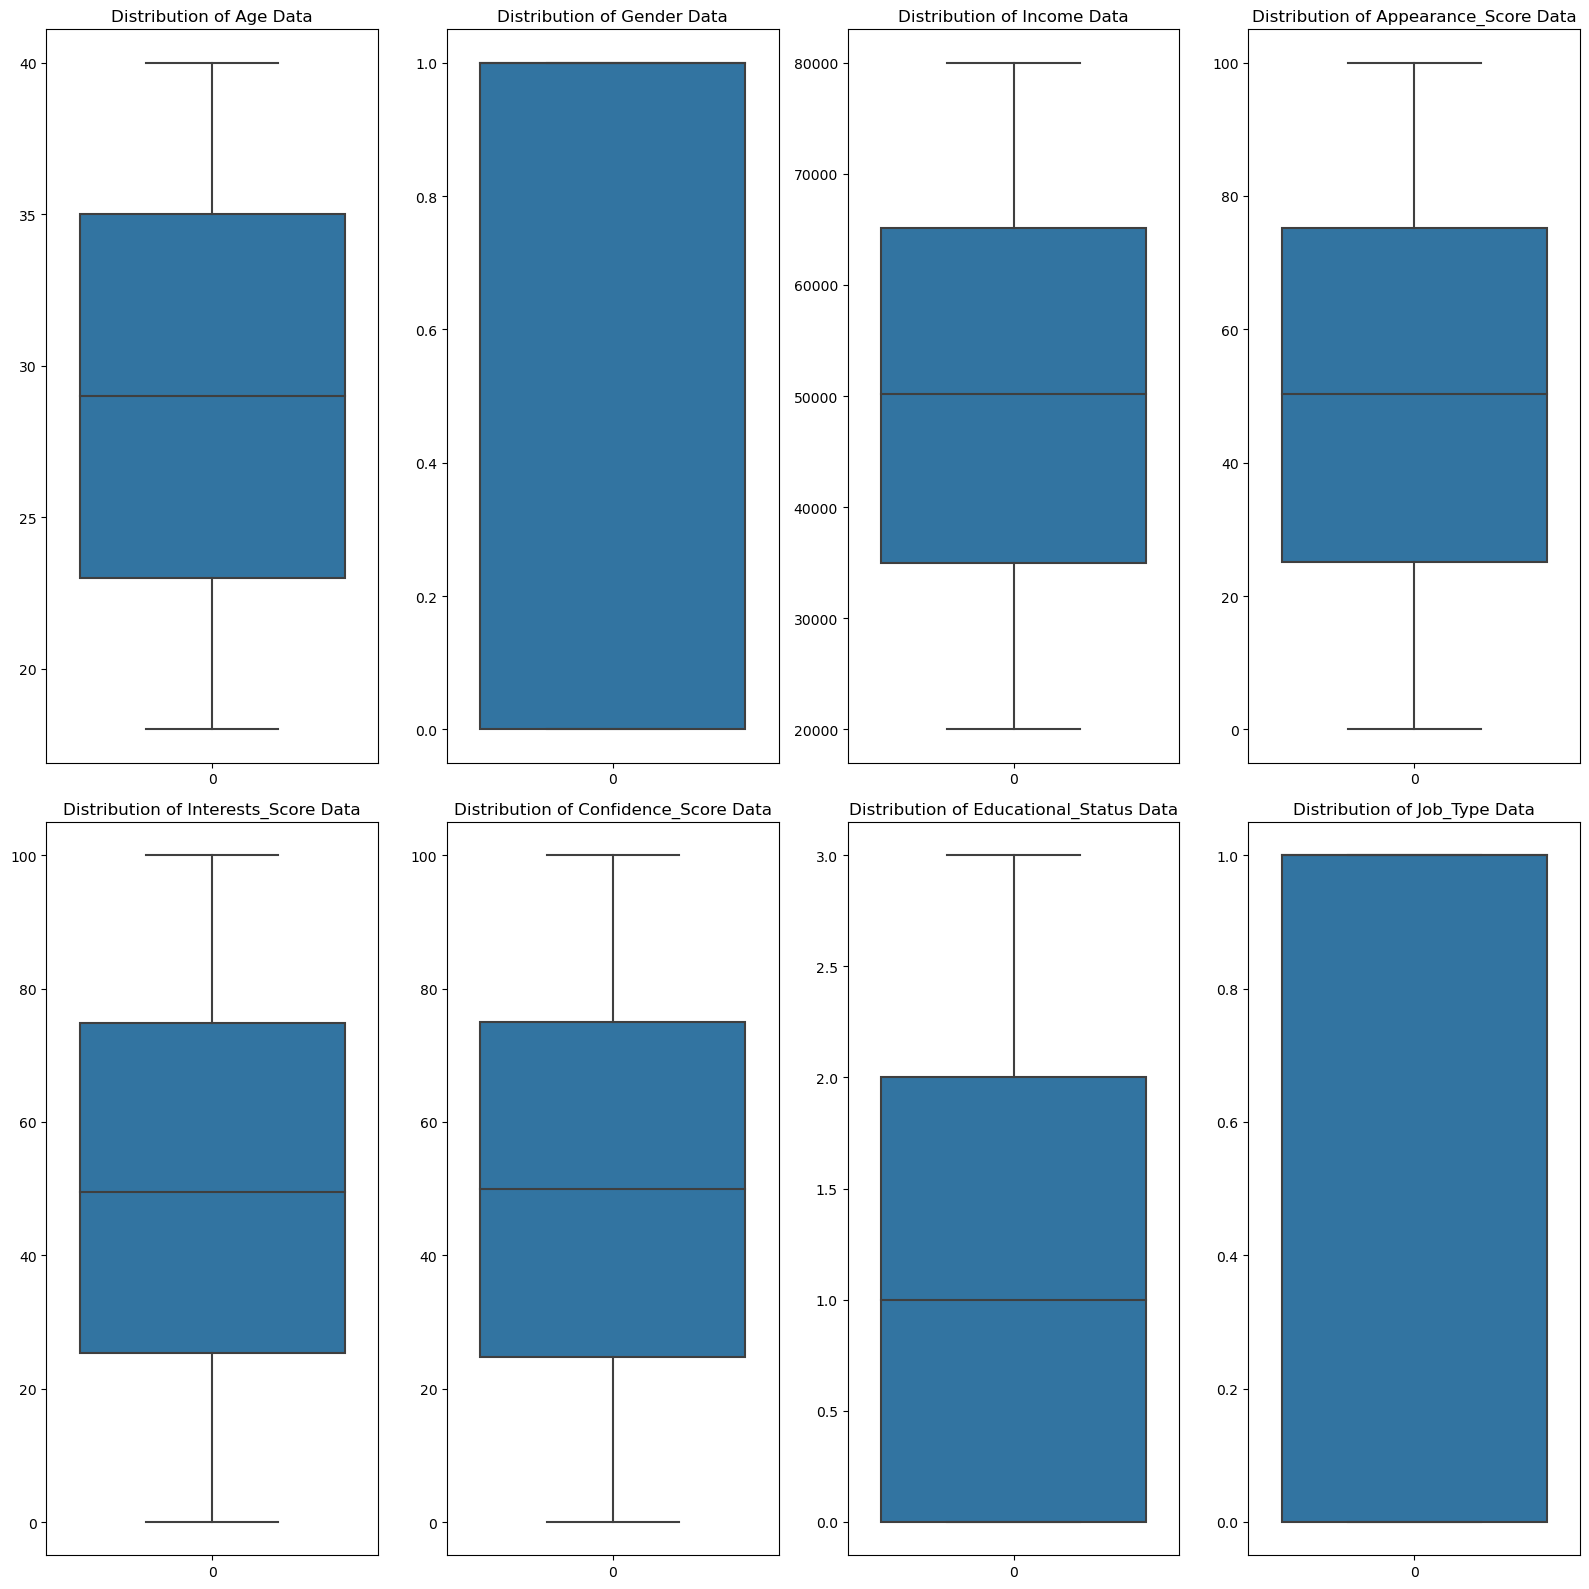

In [83]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns) - 1  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(rows, 4, i+1)
    sns.boxplot(df[col])
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18909/873944133.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18909/873944133.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18909/873944133.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18909/873944133.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18909/873944133.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18909/873944133.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/d2/2759wj910z3_bl8zjx2l83tr0000gp/T/ipykernel_18909/873944133.p

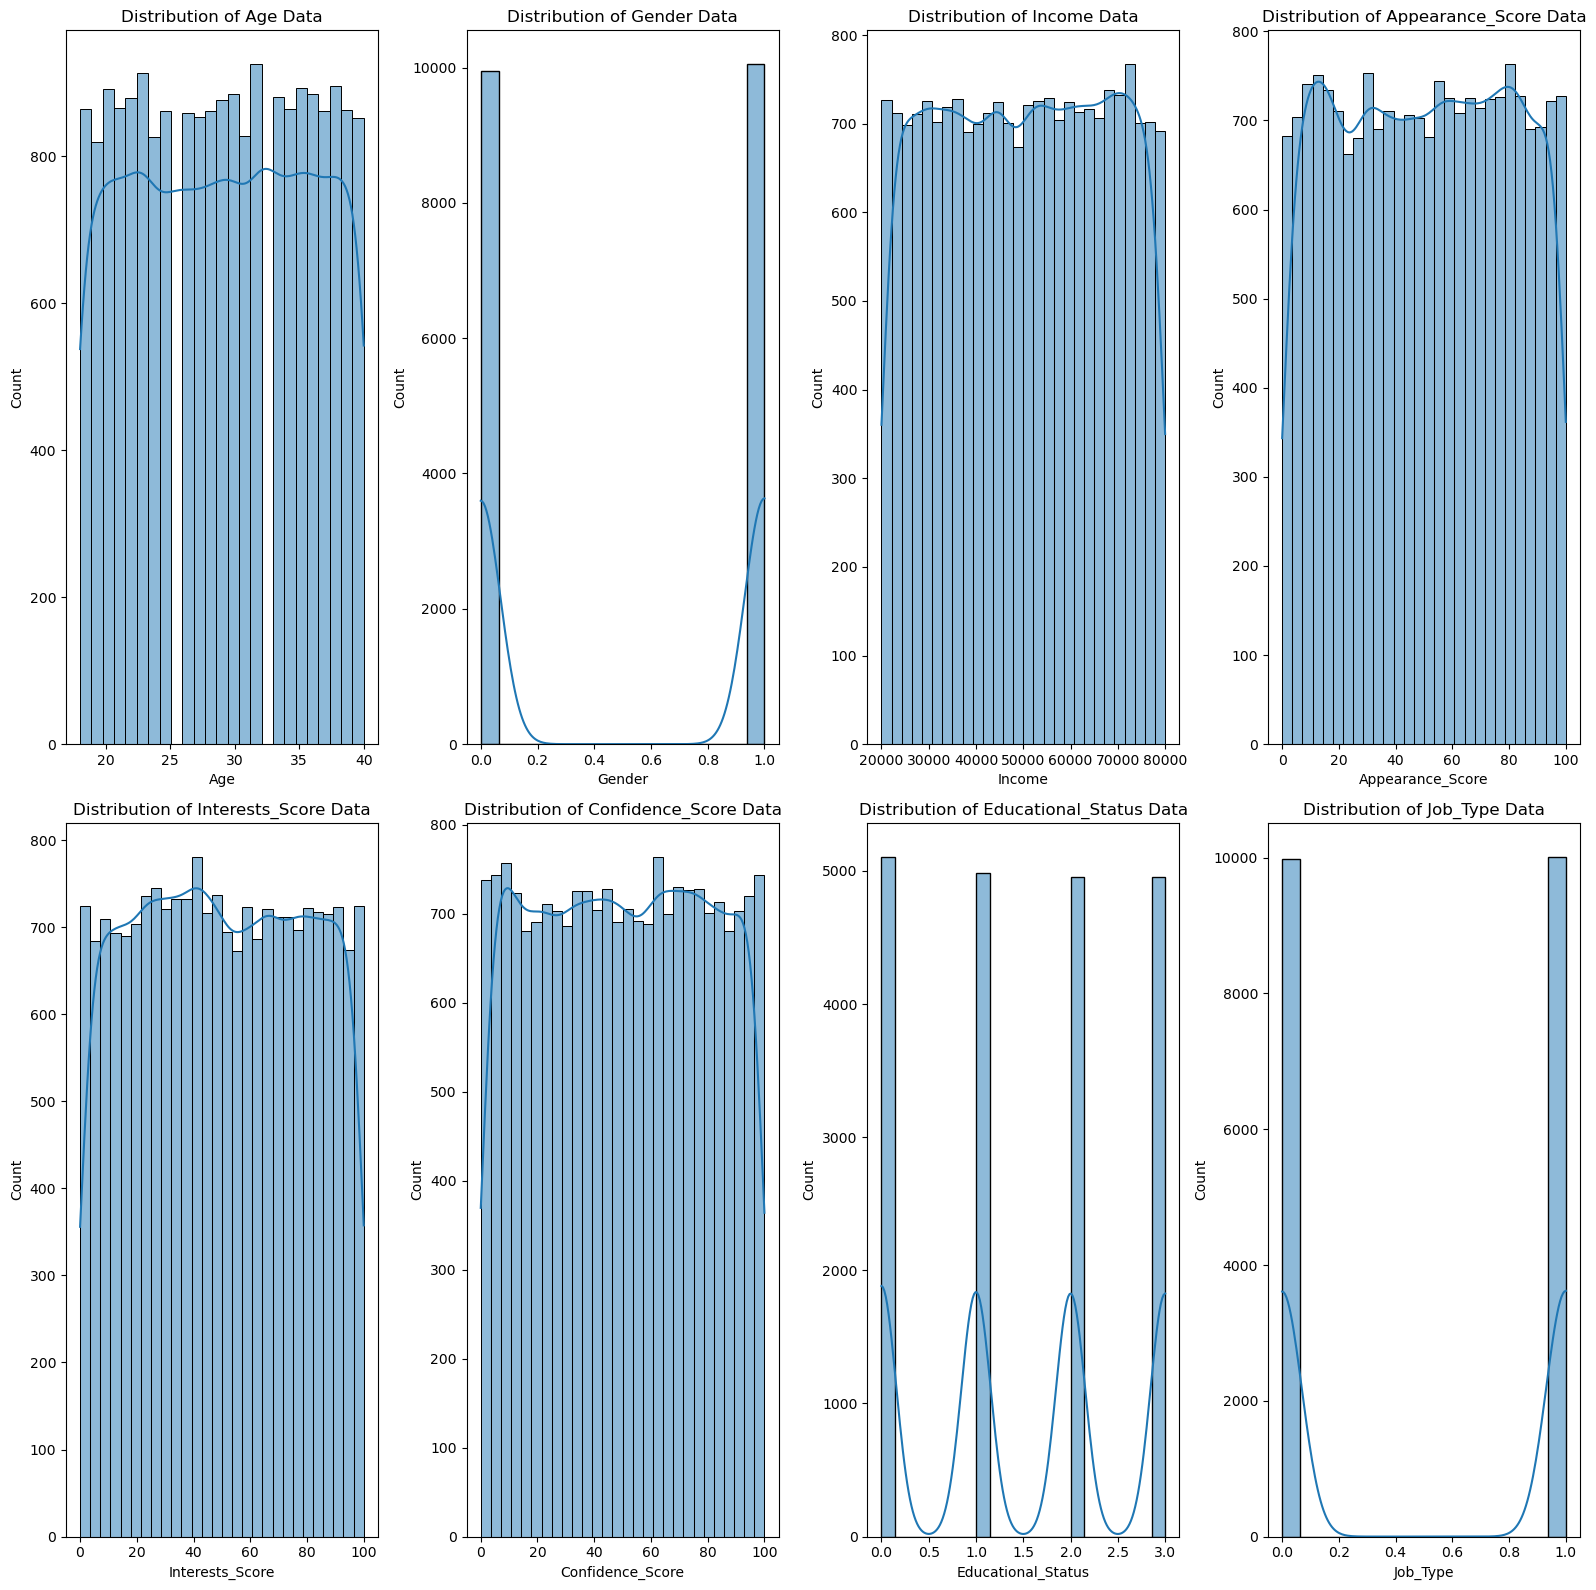

In [84]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns) - 1  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, col in enumerate(df.columns[:-1]):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

<Axes: xlabel='Educational_Status', ylabel='Income'>

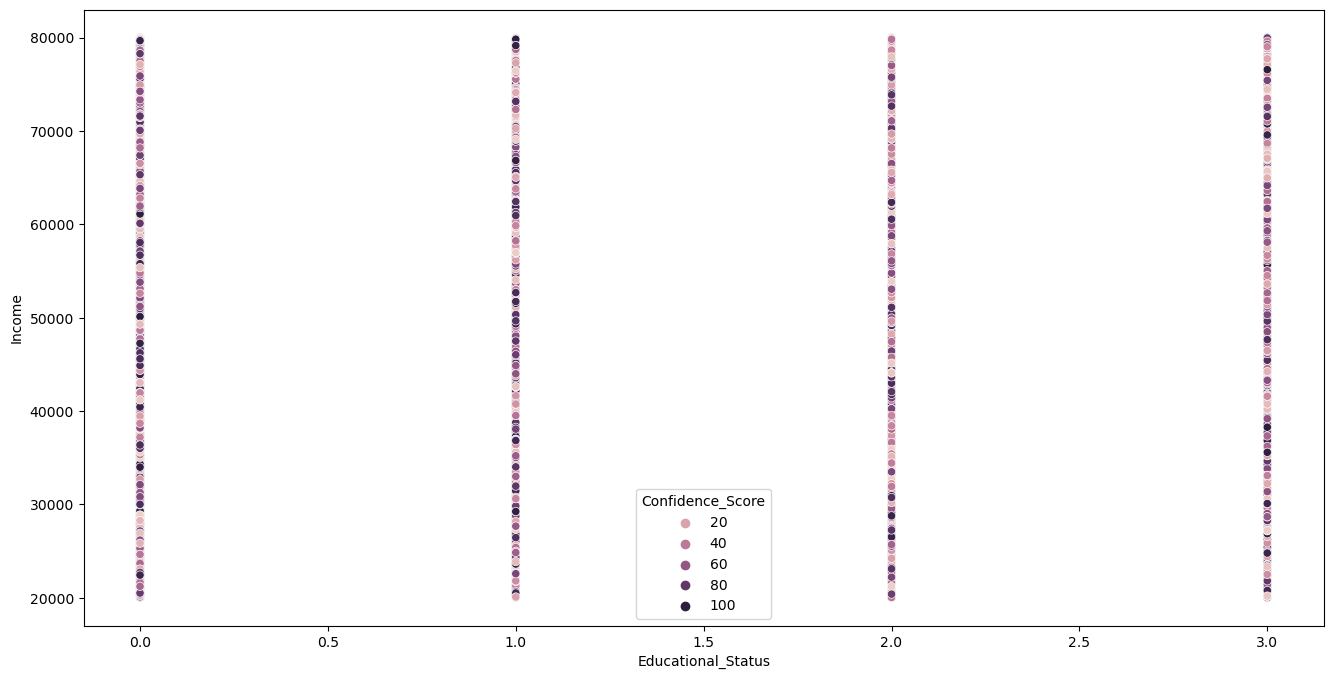

In [60]:
plt.figure(figsize=(16,8))
sns.scatterplot(y=df["Income"], x=df["Educational_Status"], hue= df['Confidence_Score'])

<Axes: xlabel='Income'>

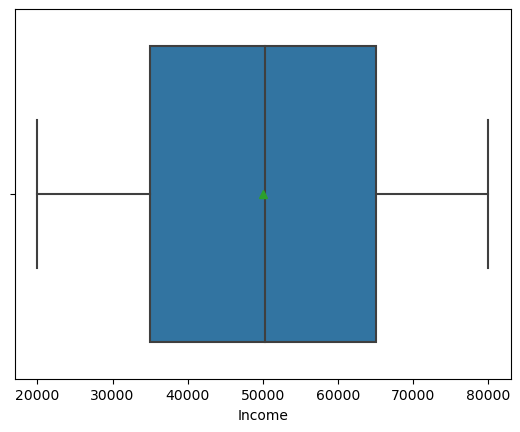

In [61]:
sns.boxplot(x="Income", showmeans=True, data=df)

<Axes: xlabel='Confidence_Score'>

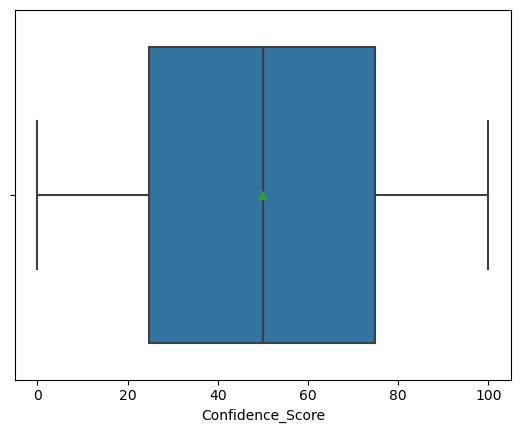

In [62]:
sns.boxplot(x="Confidence_Score", showmeans=True, data=df)

<Axes: ylabel='Frequency'>

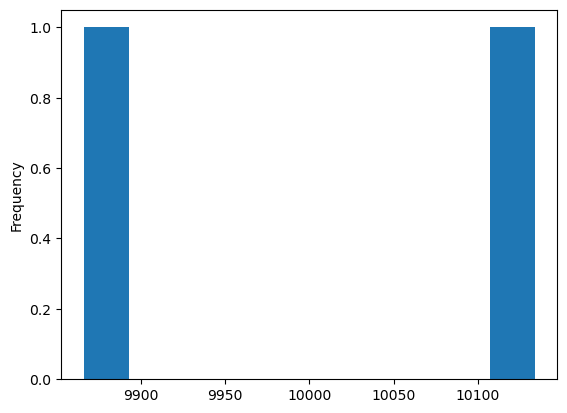

In [63]:
df["Valentine_Date"].value_counts().plot.hist()

<Axes: xlabel='Confidence_Score'>

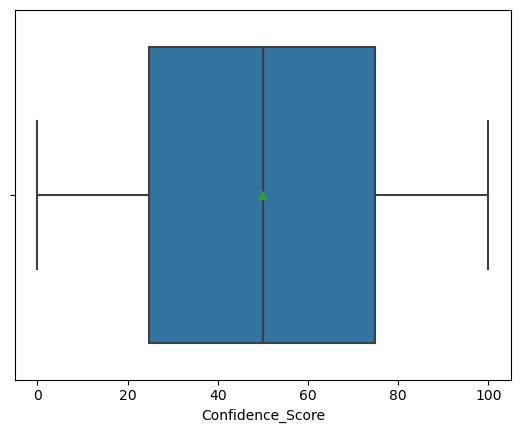

In [64]:

sns.boxplot(x="Confidence_Score", showmeans=True, data=df)

In [86]:
X,y = df.drop("Valentine_Date", axis=1), df["Valentine_Date"]


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train, y_test)

models

188/188 [==============================] - 0s 263us/step


,Model,Accuracy
0,LogisticRegression,0.503833
1,SVC,0.503333
2,DecisionTreeClassifier,0.500000
3,RandomForestClassifier,0.504500
4,KNeighborsClassifier,0.502500
5,GradientBoostingClassifier,0.496667
6,GaussianNB,0.501667
7,Sequential,0.499000


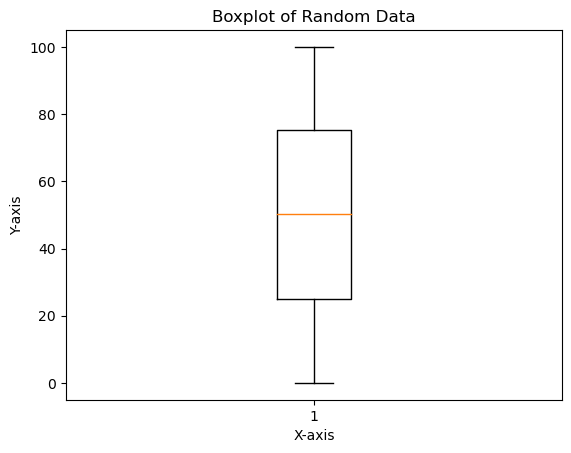

In [66]:
plt.boxplot(df["Appearance_Score"])

# Add a title and labels to the plot
plt.title("Boxplot of Random Data")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

# Show the plot
plt.show()

In [67]:
df.describe()

,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,29.033800,0.502350,50051.034150,50.136727,49.950643,49.913995,1.487700,0.500700,0.493300
std,6.622458,0.500007,17329.779354,28.877615,28.774120,28.978751,1.120675,0.500012,0.499968
min,18.000000,0.000000,20004.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,35013.250000,25.070000,25.310000,24.807500,0.000000,0.000000,0.000000
50%,29.000000,1.000000,50230.000000,50.320000,49.530000,49.960000,1.000000,1.000000,0.000000
75%,35.000000,1.000000,65120.500000,75.222500,74.880000,74.950000,2.000000,1.000000,1.000000
max,40.000000,1.000000,79998.000000,99.990000,100.000000,100.000000,3.000000,1.000000,1.000000


In [68]:
entropy_df = calculate_entropy(df)

In [69]:
entropy_df

,Age,Gender,Income,Appearance_Score,Interests_Score,Confidence_Score,Educational_Status,Job_Type,Valentine_Date
entropy,4.522962,0.999984,13.977836,12.876835,12.872009,12.876876,1.999886,0.999999,0.99987


Classification Matrix:               precision    recall  f1-score   support

           0       0.80      0.50      0.62      4801
           1       0.20      0.50      0.29      1199

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.45      6000
weighted avg       0.68      0.50      0.55      6000



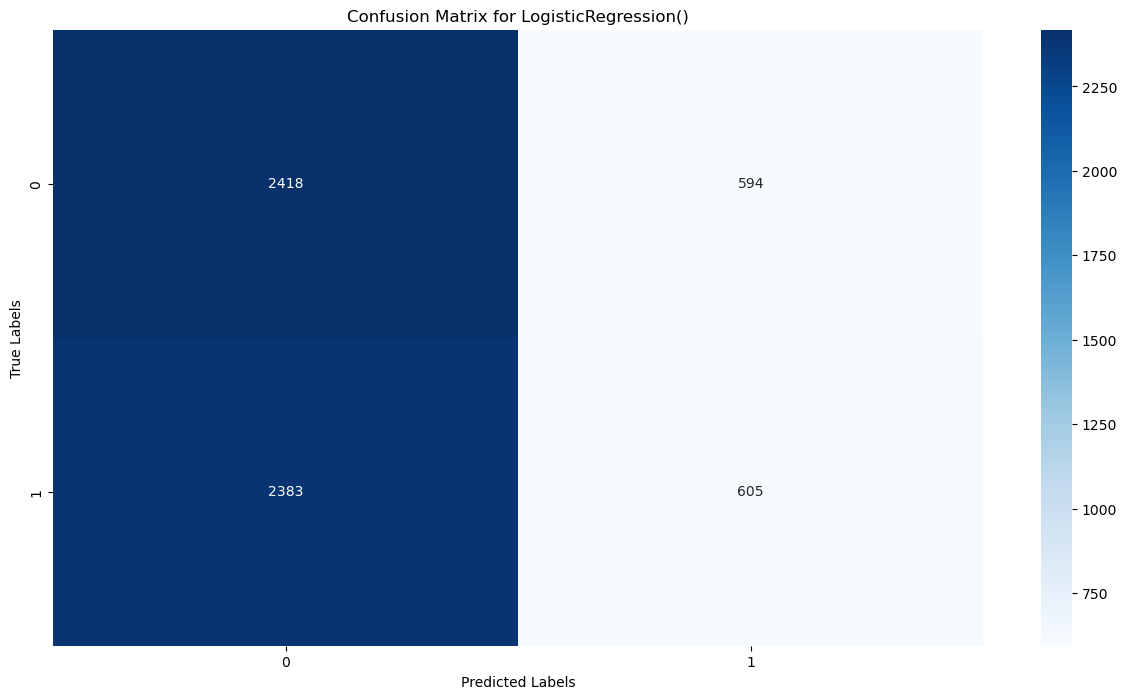

In [91]:
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train)
predictions= LR.predict(X_test_scaled)

create_confusion_matrix(LR, predictions, y_test)
